In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Online_Sales=pd.read_csv("Online_Sales.csv")
CustomersData=pd.read_excel("CustomersData.xlsx")
Tax_amount=pd.read_excel("Tax_amount.xlsx")
Discount_Coupon=pd.read_csv("Discount_Coupon.csv")
Marketing_Spend=pd.read_csv("Marketing_Spend.csv")

In [3]:
Online_Sales.tail()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
52919,14410,48493,20191231,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked
52920,14410,48494,20191231,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used
52921,14410,48495,20191231,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used
52922,14600,48496,20191231,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked
52923,14600,48497,20191231,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4,80.52,19.99,Clicked


In [4]:
Online_Sales["Transaction_Date"]=pd.to_datetime(Online_Sales["Transaction_Date"],format="%Y%m%d")

In [5]:
Online_Sales["Month"]=Online_Sales["Transaction_Date"].dt.strftime('%b')

In [6]:
CustomersData.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [7]:
Tax_amount.head()

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [8]:
Discount_Coupon.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [9]:
Discount_Coupon=Discount_Coupon.rename(columns={"Product_Category ":"Product_Category"})

In [10]:
Marketing_Spend

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30
...,...,...,...
360,12/27/2019,4000,3396.87
361,12/28/2019,4000,3246.84
362,12/29/2019,4000,2546.58
363,12/30/2019,4000,674.31


In [11]:
Marketing_Spend["Date"]=pd.to_datetime(Marketing_Spend["Date"],format="%m/%d/%Y")

In [12]:
df=Online_Sales.merge(CustomersData,on="CustomerID",how="left")
df=df.merge(Tax_amount,on="Product_Category",how="left")
df=df.merge(Discount_Coupon,on=["Month","Product_Category"],how="left")

In [13]:
df.shape

(52924, 17)

In [14]:
df.isnull().sum()

CustomerID               0
Transaction_ID           0
Transaction_Date         0
Product_SKU              0
Product_Description      0
Product_Category         0
Quantity                 0
Avg_Price                0
Delivery_Charges         0
Coupon_Status            0
Month                    0
Gender                   0
Location                 0
Tenure_Months            0
GST                      0
Coupon_Code            400
Discount_pct           400
dtype: int64

In [15]:
df["Discount_pct"]=df["Discount_pct"].fillna(0)

In [16]:
df["Coupon_Code"]=df["Coupon_Code"].fillna("No Coupon")

## Calculate Invoice amount or sale_amount or revenue for each transaction and item level

Invoice Value =(( Quantity*Avg_price)*(1-Dicount_pct)*(1+GST))+Delivery_Charges

In [17]:
df.head(1)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Gender,Location,Tenure_Months,GST,Coupon_Code,Discount_pct
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,M,Chicago,12,0.1,ELEC10,10.0


In [18]:
df["Invoice Value"]=(( df["Quantity"]*df["Avg_Price"])*(1-df["Discount_pct"]/100))*(1+df["GST"])+df["Delivery_Charges"]

In [19]:
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Gender,Location,Tenure_Months,GST,Coupon_Code,Discount_pct,Invoice Value
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,M,Chicago,12,0.10,ELEC10,10.0,158.6729
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,M,Chicago,12,0.10,ELEC10,10.0,158.6729
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,M,Chicago,12,0.10,OFF10,10.0,8.5295
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,M,Chicago,12,0.18,SALE10,10.0,99.5843
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,M,Chicago,12,0.18,AIO10,10.0,24.0230


In [20]:
df.groupby(by="Product_SKU")['Invoice Value'].sum()

Product_SKU
GGOEA0CH077599     6470.61085
GGOEAAAB034813      425.72510
GGOEAAAB034814      866.34704
GGOEAAAB034815      922.55824
GGOEAAAB034816      551.97818
                     ...     
GGOEYOCR077399     1908.45840
GGOEYOCR077799    19507.87200
GGOEYOCR078099     3621.70265
GGOEYOLR018699    10690.91760
GGOEYOLR080599     2292.85990
Name: Invoice Value, Length: 1145, dtype: float64

## Understanding how many customers acquired every month

In [21]:
df

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Gender,Location,Tenure_Months,GST,Coupon_Code,Discount_pct,Invoice Value
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan,M,Chicago,12,0.10,ELEC10,10.0,158.67290
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan,M,Chicago,12,0.10,ELEC10,10.0,158.67290
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,Jan,M,Chicago,12,0.10,OFF10,10.0,8.52950
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,Jan,M,Chicago,12,0.18,SALE10,10.0,99.58430
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,Jan,M,Chicago,12,0.18,AIO10,10.0,24.02300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,Dec,F,New York,45,0.10,ELEC30,30.0,99.90100
52920,14410,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,Dec,F,New York,45,0.18,SALE30,30.0,46.90792
52921,14410,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,Dec,F,New York,45,0.10,ELEC30,30.0,123.44760
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,Dec,F,California,7,0.10,ELEC30,30.0,316.50200


In [22]:
min_overall_transaction_df = df.groupby(['CustomerID']).agg(
    min_transaction_date=('Transaction_Date', 'min')).reset_index()

df=pd.merge(df,min_overall_transaction_df[["CustomerID","min_transaction_date"]],on='CustomerID',how='left')

df['customer_category'] = df.apply(
    lambda row: 'EXISTING' if row['Transaction_Date'] > row['min_transaction_date'] else 'NEW', axis=1)

In [23]:
df['year-month'] = df['Transaction_Date'].dt.to_period('M')

#Online_Sales['year-month'] = Online_Sales['Transaction_Date'].dt.to_period('M')

In [24]:
new_customers_per_month = df[df["customer_category"]=="NEW"].groupby('year-month')['CustomerID'].nunique().reset_index()
new_customers_per_month.columns = ['Month', 'New Customers']

new_customers_per_month

,Month,New Customers
0,2019-01,215
1,2019-02,96
2,2019-03,177
3,2019-04,163
4,2019-05,112
5,2019-06,137
6,2019-07,94
7,2019-08,135
8,2019-09,78
9,2019-10,87


## Understand the retention of customers on month on month basis

In [25]:

# Extract the month of the first purchase (Cohort Month)
df['cohort_month'] = df.groupby('CustomerID')['Transaction_Date'].transform('min').dt.to_period('M')

In [26]:

# Extract the order month (Activity Month)
df['order_month'] = df['Transaction_Date'].dt.to_period('M')

# Calculate the time offset (in months) between the cohort month and the order month
df['cohort_index'] = (df['order_month'] - df['cohort_month']).apply(lambda x: x.n)

# Count the number of unique customers for each cohort and cohort index
cohort_data = df.groupby(['cohort_month', 'cohort_index']).agg({'CustomerID': 'nunique'}).reset_index()

# Pivot the data to create a cohort table
cohort_table = cohort_data.pivot_table(index='cohort_month', columns='cohort_index', values='CustomerID')

# Calculate retention rates by dividing by the number of customers in each cohort's first month
cohort_size = cohort_table.iloc[:, 0]
retention = cohort_table.divide(cohort_size, axis=0)

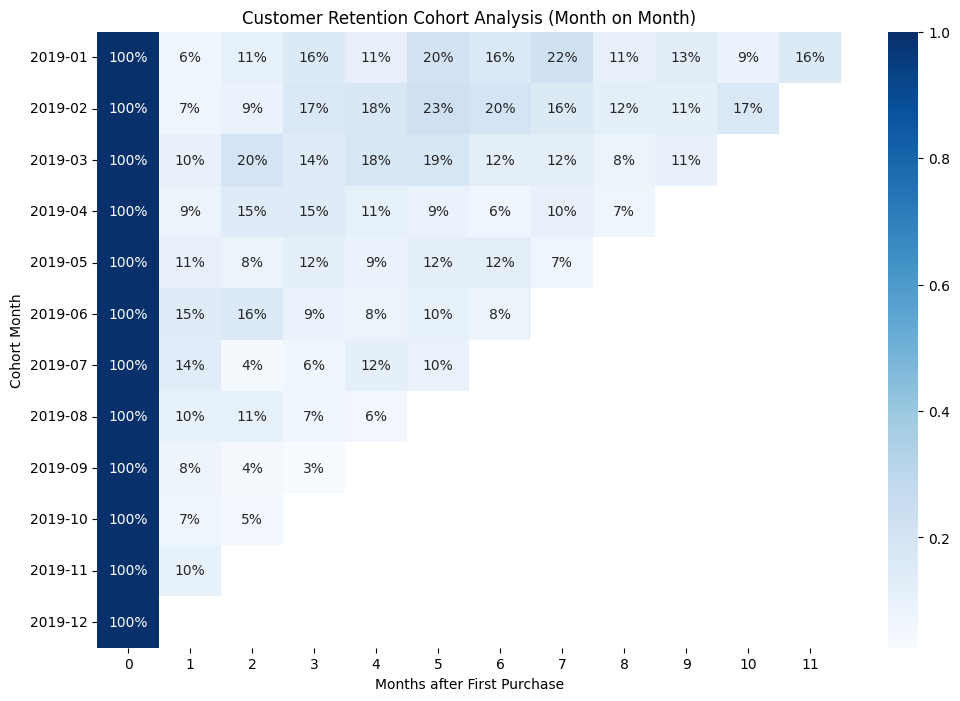

In [27]:
# Visualize the retention table
plt.figure(figsize=(12, 8))
sns.heatmap(retention, annot=True, fmt='0.00%', cmap='Blues')
plt.title('Customer Retention Cohort Analysis (Month on Month)')
plt.xlabel('Months after First Purchase')
plt.ylabel('Cohort Month')
plt.show()

## How the revenues from existing/new customers on month on month basis

In [28]:
monthly_revenue = df.groupby(['year-month', 'customer_category']).agg({'Invoice Value': 'sum'}).reset_index()
monthly_revenue.columns = ['Month', 'Customer Type', 'Total Revenue']

# Pivot the data to compare new vs existing customers
revenue_pivot = monthly_revenue.pivot(index='Month', columns='Customer Type', values='Total Revenue').fillna(0)

revenue_pivot

Customer Type,EXISTING,NEW
Month,,
2019-01,91608.38045,372274.67660
2019-02,115185.17784,212711.38236
2019-03,117586.06969,219219.13414
2019-04,252750.08976,195249.10547
2019-05,160820.72636,157735.57420
2019-06,134556.61503,155273.71428
2019-07,305545.05553,118437.28808
2019-08,243542.71920,174617.84784
2019-09,202096.75115,119031.60523


## How the discounts playing role in the revenues?

In [29]:
df["Invoice Value without Discount"]=(( df["Quantity"]*df["Avg_Price"]))*(1+df["GST"])+df["Delivery_Charges"]

In [30]:
df["Revenue Loss"]=df["Invoice Value without Discount"]-df["Invoice Value"]

In [31]:
df.groupby(["year-month"])[["Quantity","Invoice Value without Discount","Invoice Value","Revenue Loss"]].sum()

,Quantity,Invoice Value without Discount,Invoice Value,Revenue Loss
year-month,,,,
2019-01,20140,508514.7551,463883.05705,44631.69805
2019-02,16575,396865.6570,327896.56020,68969.09680
2019-03,20787,453205.0673,336805.20383,116399.86347
2019-04,25277,492559.7069,447999.19523,44560.51167
2019-05,18715,386779.2954,318556.30056,68222.99484
2019-06,21619,397002.9339,289830.32931,107172.60459
2019-07,22898,465289.0189,423982.34361,41306.67529
2019-08,27457,506936.6100,418160.56704,88776.04296
2019-09,19353,440822.4258,321128.35638,119694.06942


## Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day etc…

In [32]:
print(f"Revenue {df["Invoice Value"].sum()}")

Revenue 4714511.55927


In [33]:
print(f"Orders {df["Transaction_ID"].nunique()}")

Orders 25061


In [34]:
print(f"average order value {df["Invoice Value"].sum()/df["Transaction_ID"].nunique()}")

average order value 188.1214460424564


In [35]:
df.groupby("CustomerID")["Invoice Value"].sum()/df.groupby("CustomerID")["Transaction_ID"].nunique()

CustomerID
12346    174.981740
12347    390.009542
12348    187.740775
12350    107.610358
12356    134.880835
            ...    
18259    272.136600
18260    139.328438
18269     77.830460
18277    301.020000
18283    131.524628
Length: 1468, dtype: float64

In [36]:
df.groupby("customer_category")["CustomerID"].nunique()

customer_category
EXISTING     734
NEW         1468
Name: CustomerID, dtype: int64

In [37]:
pd.DataFrame(df.groupby(df['Transaction_Date'].dt.to_period('M'))["Quantity"].sum())

,Quantity
Transaction_Date,
2019-01,20140
2019-02,16575
2019-03,20787
2019-04,25277
2019-05,18715
2019-06,21619
2019-07,22898
2019-08,27457
2019-09,19353


In [38]:
pd.DataFrame(df.groupby(df['Transaction_Date'].dt.to_period('W'))["Quantity"].sum())

,Quantity
Transaction_Date,
2018-12-31/2019-01-06,5731
2019-01-07/2019-01-13,4665
2019-01-14/2019-01-20,4319
2019-01-21/2019-01-27,3074
2019-01-28/2019-02-03,4317
2019-02-04/2019-02-10,3655
2019-02-11/2019-02-17,5255
2019-02-18/2019-02-24,3675
2019-02-25/2019-03-03,3642


In [39]:
pd.DataFrame(df.groupby(df['Transaction_Date'].dt.to_period('D'))["Quantity"].sum())

,Quantity
Transaction_Date,
2019-01-01,352
2019-01-02,256
2019-01-03,816
2019-01-04,604
2019-01-05,2392
...,...
2019-12-27,278
2019-12-28,114
2019-12-29,121


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CustomerID                      52924 non-null  int64         
 1   Transaction_ID                  52924 non-null  int64         
 2   Transaction_Date                52924 non-null  datetime64[ns]
 3   Product_SKU                     52924 non-null  object        
 4   Product_Description             52924 non-null  object        
 5   Product_Category                52924 non-null  object        
 6   Quantity                        52924 non-null  int64         
 7   Avg_Price                       52924 non-null  float64       
 8   Delivery_Charges                52924 non-null  float64       
 9   Coupon_Status                   52924 non-null  object        
 10  Month                           52924 non-null  object        
 11  Ge

## Understand the trends/seasonality of sales by category, location, month, etc.

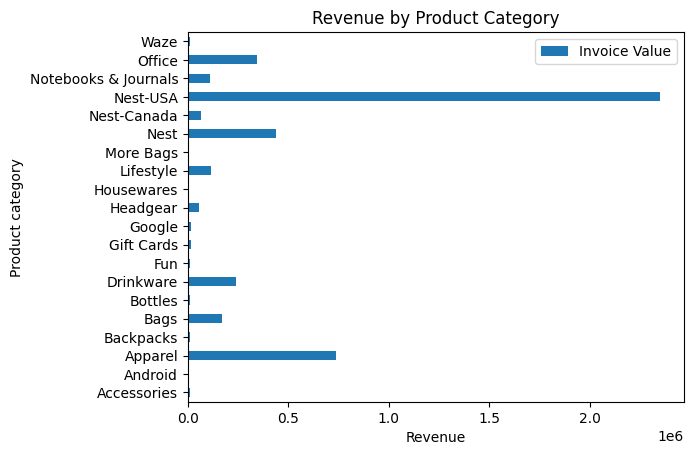

In [41]:
monthly_sales = pd.DataFrame(df.groupby('Product_Category')['Invoice Value'].sum().reset_index())
# Plotting sales trends by product category
#plt.figure(figsize=(24, 6))
monthly_sales.plot.barh(y='Invoice Value',x='Product_Category')
plt.title("Revenue by Product Category")
plt.xlabel("Revenue")
plt.ylabel("Product category")
plt.show()


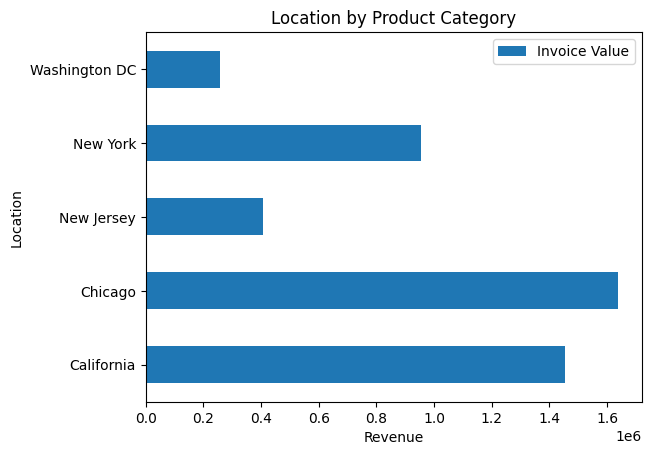

In [42]:
monthly_sales = pd.DataFrame(df.groupby('Location')['Invoice Value'].sum().reset_index())
# Plotting sales trends by product category
#plt.figure(figsize=(24, 6))
monthly_sales.plot.barh(y='Invoice Value',x='Location')
plt.title("Location by Product Category")
plt.xlabel("Revenue")
plt.ylabel("Location")
plt.show()


<Figure size 2400x600 with 0 Axes>

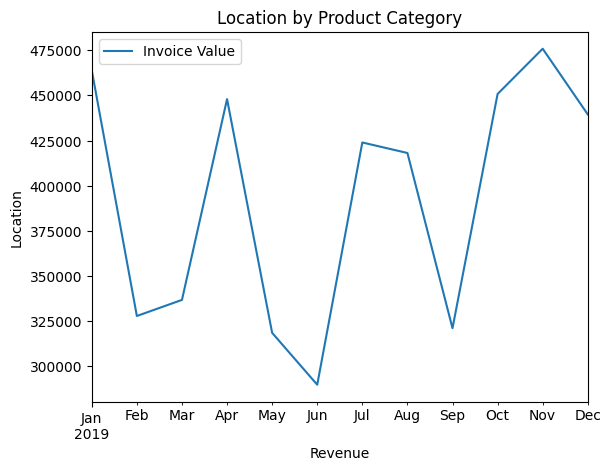

In [43]:
monthly_sales = pd.DataFrame(df.groupby(df['Transaction_Date'].dt.to_period('M'))['Invoice Value'].sum().reset_index())
# Plotting sales trends by product category
plt.figure(figsize=(24, 6))
monthly_sales.plot.line(y='Invoice Value',x='Transaction_Date')
plt.title("Location by Product Category")
plt.xlabel("Revenue")
plt.ylabel("Location")
plt.show()

<Figure size 600x2400 with 0 Axes>

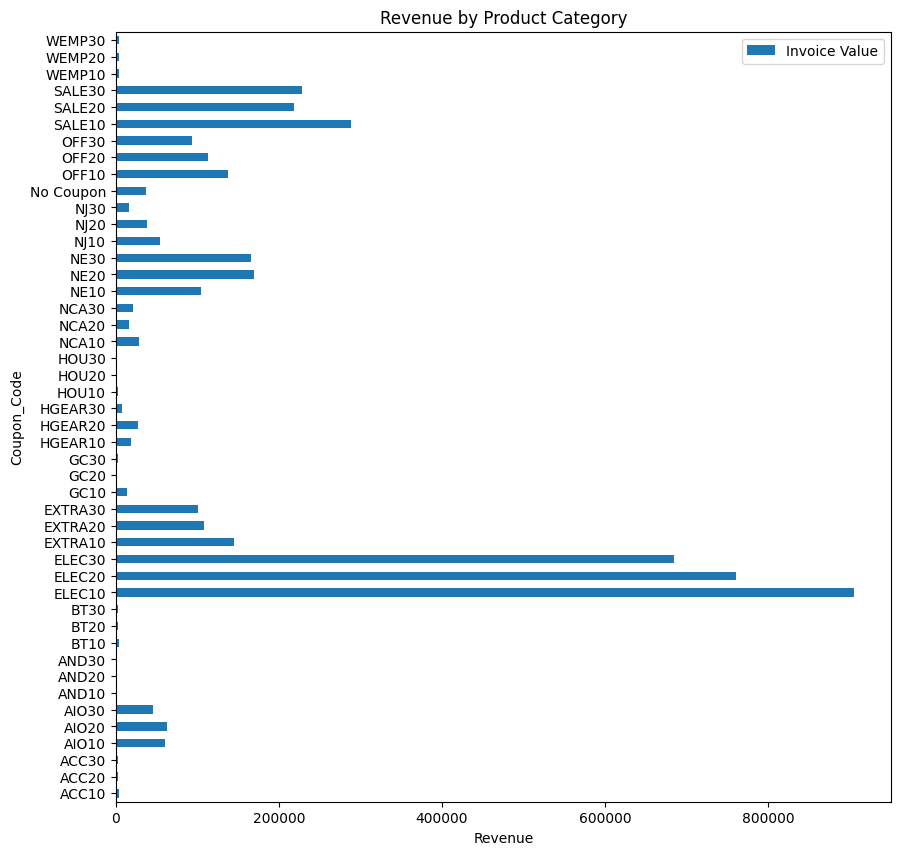

In [44]:
monthly_sales = pd.DataFrame(df.groupby('Coupon_Code')['Invoice Value'].sum().reset_index())
# Plotting sales trends by product category
plt.figure(figsize=(6, 24))
monthly_sales.plot(kind="barh",y='Invoice Value',x='Coupon_Code',figsize=(10, 10))
plt.title("Revenue by Product Category")
plt.xlabel("Revenue")
plt.ylabel("Coupon_Code")
plt.show()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CustomerID                      52924 non-null  int64         
 1   Transaction_ID                  52924 non-null  int64         
 2   Transaction_Date                52924 non-null  datetime64[ns]
 3   Product_SKU                     52924 non-null  object        
 4   Product_Description             52924 non-null  object        
 5   Product_Category                52924 non-null  object        
 6   Quantity                        52924 non-null  int64         
 7   Avg_Price                       52924 non-null  float64       
 8   Delivery_Charges                52924 non-null  float64       
 9   Coupon_Status                   52924 non-null  object        
 10  Month                           52924 non-null  object        
 11  Ge

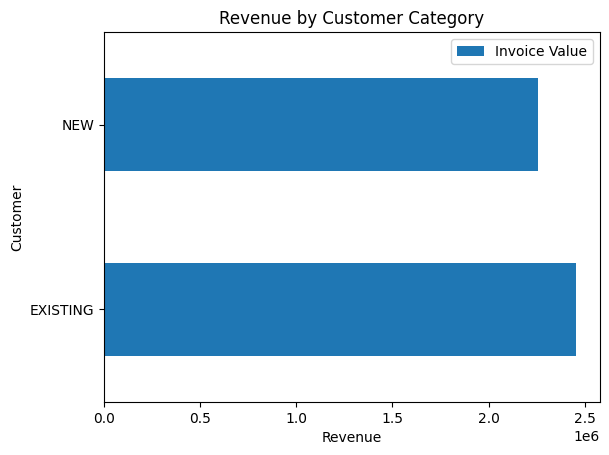

In [46]:
monthly_sales = pd.DataFrame(df.groupby('customer_category')['Invoice Value'].sum().reset_index())
# Plotting sales trends by product category

monthly_sales.plot(kind="barh",y='Invoice Value',x='customer_category')
plt.title("Revenue by Customer Category")
plt.xlabel("Revenue")
plt.ylabel("Customer")
plt.show()

## How number order varies and sales with different days? 

In [47]:
monthly_sales = df.groupby(df['Transaction_Date'].dt.day_name()).agg(
    orders=('Transaction_ID', 'nunique'), 
    Sales=('Invoice Value', 'sum')).reset_index()


In [48]:
monthly_sales

,Transaction_Date,orders,Sales
0,Friday,4233,872214.30068
1,Monday,2130,356667.46330
2,Saturday,3872,692889.26471
3,Sunday,3855,707840.85728
4,Thursday,4278,855069.37865
5,Tuesday,2315,393222.75063
6,Wednesday,4378,836607.54402


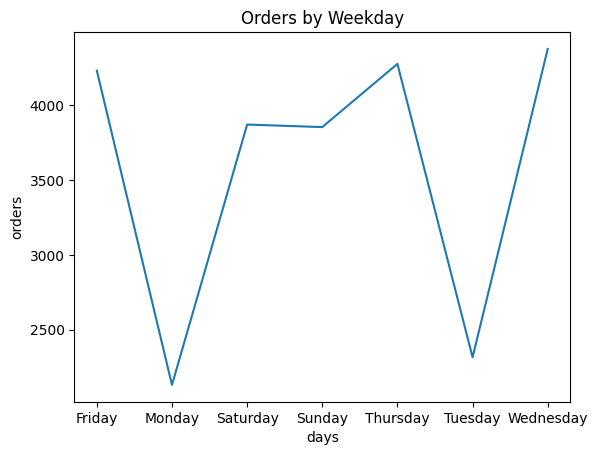

In [49]:

plt.plot(monthly_sales['Transaction_Date'],monthly_sales['orders'],label="orders")

plt.title("Orders by Weekday")
plt.xlabel("days")
plt.ylabel("orders")
plt.show()

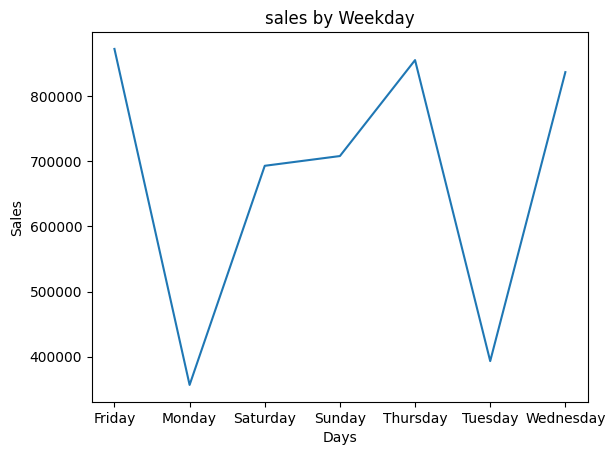

In [50]:
plt.plot(monthly_sales['Transaction_Date'],monthly_sales['Sales'],label="sales")
plt.title("sales by Weekday")
plt.xlabel("Days")
plt.ylabel("Sales")
plt.show()

## Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month.

In [51]:
summary=df.groupby('year-month').agg(revenue=("Invoice Value","sum"),Delivery_Charges=("Delivery_Charges","sum"),
                             Tax=("GST","sum"))

In [52]:
Marketing_Spend["year-month"]=Marketing_Spend['Date'].dt.to_period('M')

In [53]:
Marketing_Spend=Marketing_Spend.groupby("year-month").agg(online_spend=("Offline_Spend","sum"),offline_spend=("Online_Spend","sum"))

In [54]:
Marketing_Spend["total_spend"]=Marketing_Spend["offline_spend"]+Marketing_Spend["online_spend"]

In [55]:
summary=summary.merge(Marketing_Spend["total_spend"], on="year-month")

In [56]:
summary["pct_marketing_spend"]=summary["total_spend"]/summary["revenue"]*100

In [57]:
summary["pct_delivery_charges_spend"]=summary["Delivery_Charges"]/summary["revenue"]*100

In [58]:
summary

,revenue,Delivery_Charges,Tax,total_spend,pct_marketing_spend,pct_delivery_charges_spend
year-month,,,,,,
2019-01,463883.05705,59242.32,535.06,154928.95,33.398277,12.770960
2019-02,327896.56020,49216.60,447.00,137107.92,41.814382,15.009795
2019-03,336805.20383,60799.94,616.01,122250.09,36.296972,18.051960
2019-04,447999.19523,41481.74,591.56,157026.83,35.050695,9.259334
2019-05,318556.30056,41396.17,662.23,118259.64,37.123623,12.994931
2019-06,289830.32931,37513.58,600.45,134318.14,46.343714,12.943290
2019-07,423982.34361,48723.93,760.71,120217.85,28.354447,11.491971
2019-08,418160.56704,61099.57,913.41,142904.15,34.174468,14.611509
2019-09,321128.35638,41005.42,597.06,135514.54,42.199494,12.769168


## How marketing spend is impacting on revenue? 

In [59]:
correlation = summary['total_spend'].corr(summary['revenue'])
print(f"Correlation between Marketing Spend and Revenue: {correlation:.2f}")

Correlation between Marketing Spend and Revenue: 0.61


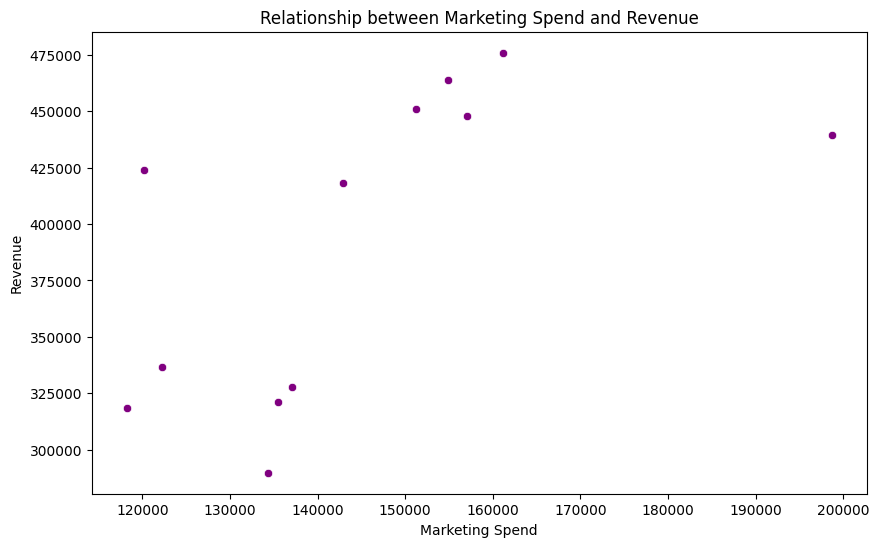

In [60]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_spend', y='revenue', data=summary, color='purple')
plt.title("Relationship between Marketing Spend and Revenue")
plt.xlabel("Marketing Spend")
plt.ylabel("Revenue")
plt.show()

## Which product was appeared in the transactions?

In [61]:
df["Product_SKU"].unique()

array(['GGOENEBJ079499', 'GGOEGFKQ020399', 'GGOEGAAB010516', ...,
       'GGOEGDHQ086199', 'GGOEGDWQ087699', 'GGOEGOCJ093999'], dtype=object)

## Which product was purchased mostly based on the quantity

In [62]:
df.groupby("Product_SKU")["Quantity"].sum().sort_values(ascending=False)

Product_SKU
GGOEGGOA017399    16234
GGOEGDHC018299     9728
GGOEGBMJ013399     7321
GGOEGOLC014299     6496
GGOEGFKQ020399     5847
                  ...  
GGOEGAXR066029        1
GGOEGAXT065429        1
GGOEGAQJ058715        1
GGOEGAEB031513        1
GGOEGALQ058116        1
Name: Quantity, Length: 1145, dtype: int64

## Performing Customer Segmentation

## Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver, Standard customers and define strategy on the same.

In [63]:
from datetime import datetime as dt

In [64]:
reference_date = dt.now()

In [65]:
# Calculate R, F, M values for each customer
rfm = df.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (reference_date - x.max()).days,   # Recency
    'CustomerID': 'count',                                           # Frequency
    'Invoice Value': 'sum'                                           # Monetary
}).rename(columns={'Transaction_Date': 'Recency', 'CustomerID': 'Frequency', 'Invoice Value': 'Monetary'}).reset_index()


# Assign RFM Scores based on quantiles
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

# Calculate RFM Score
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

# Step 2: Segment customers based on RFM score
def assign_segment(rfm_score):
    if rfm_score >= 10:
        return 'Premium'
    elif rfm_score >= 7:
        return 'Gold'
    elif rfm_score >= 4:
        return 'Silver'
    else:
        return 'Standard'

rfm['Segment'] = rfm['RFM_Score'].apply(assign_segment)

In [66]:
rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,12346,1882,2,174.98174,3,1,1,5,Silver
1,12347,1834,60,12090.29580,3,4,4,11,Premium
2,12348,1848,23,1501.92620,3,3,2,8,Gold
3,12350,1792,17,1183.71394,4,2,2,8,Gold
4,12356,1882,36,1753.45086,3,3,2,8,Gold
...,...,...,...,...,...,...,...,...,...
1463,18259,2045,7,816.40980,1,1,2,4,Silver
1464,18260,1862,40,2647.24033,3,3,3,9,Gold
1465,18269,1969,8,155.66092,2,1,1,4,Silver
1466,18277,1844,1,301.02000,3,1,1,5,Silver


In [67]:
rfm.groupby('Segment')[["Recency","Frequency","Monetary"]].mean().round(2)

,Recency,Frequency,Monetary
Segment,,,
Gold,1920.18,31.88,2764.76
Premium,1838.79,81.21,7517.84
Silver,1952.81,10.15,763.99
Standard,2062.60,3.65,239.21


#### Strategy Based on Segments:

Premium: Focus on loyalty programs and exclusive offers to retain these top customers.

Gold: Provide targeted upsell and cross-sell opportunities; encourage Gold members to reach Premium status.

Silver: Offer discounts or incentives to increase purchase frequency and total spend.

Standard: Send engagement campaigns or introductory offers to re-engage these customers.

## Scientific (Using K-Means) & Understand the profiles. Define a strategy for each segment

In [68]:
import pandas as pd
from datetime import datetime as dt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# Reference date for recency calculation
reference_date = dt.now()

# Calculate Recency, Frequency, and Monetary values for each customer
rfm = df.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (reference_date - x.max()).days,  # Recency
    'CustomerID': 'count',                                          # Frequency
    'Invoice Value': 'sum'                                          # Monetary
}).rename(columns={'Transaction_Date': 'Recency', 'CustomerID': 'Frequency', 'Invoice Value': 'Monetary'}).reset_index()


In [70]:

# Step 2: Standardize the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


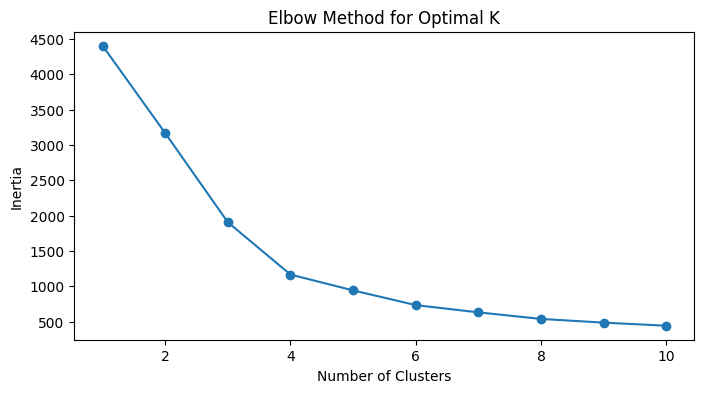

In [71]:

# Step 3: Determine optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()



In [72]:
# Step 4: Apply K-Means with 4 clusters ( Compute cluster centers and predict cluster index for each sample.)
kmeans = KMeans(n_clusters=4, random_state=0)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Step 5: Interpret the Clusters
# View the mean values for each cluster
cluster_summary = rfm.groupby('Cluster').mean().round(2)

In [73]:
rfm

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346,1882,2,174.98174,3
1,12347,1834,60,12090.29580,0
2,12348,1848,23,1501.92620,3
3,12350,1792,17,1183.71394,3
4,12356,1882,36,1753.45086,3
...,...,...,...,...,...
1463,18259,2045,7,816.40980,1
1464,18260,1862,40,2647.24033,3
1465,18269,1969,8,155.66092,1
1466,18277,1844,1,301.02000,3


In [74]:
rfm.groupby('Cluster')[["Recency","Frequency","Monetary"]].mean().round(2)

,Recency,Frequency,Monetary
Cluster,,,
0,1858.40,118.83,10997.01
1,2029.57,20.58,1746.17
2,1855.83,541.50,58498.70
3,1852.36,26.09,2220.03


Cluster 0 - Regular Medium-Spenders (Moderate Recency, Moderate Frequency, Moderate Monetary):

Moderate spending and frequency with a relatively recent purchase.
Strategy: Target them with offers to encourage higher spending and transition them to Premium.

Cluster 1 - Occasional Low-Spenders (Low Recency, Low Frequency, Low Monetary):

Customers with infrequent, low-spend purchases and haven’t shopped recently.
Strategy: Run frequent re-engagement campaigns to keep them active and explore upsell opportunities.
    
Cluster 2 - Premium (High Recency, High Frequency, High Monetary):

Customers who purchase frequently, recently, and have high spending.
Strategy: Build strong loyalty programs, exclusive benefits, and retain with top-tier customer service.

Cluster 3 - High-Value but Infrequent Buyers (High Recency, Low Frequency, High Monetary):

Customers with recent, high-value purchases but low frequency.
Strategy:  Focus on re-engagement and targeted campaigns to drive repeat purchases.



## Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)

## First define dependent variable with categories low value, medium value, high value using customer revenue.

In [75]:
customer_revenue = df.groupby('CustomerID')['Invoice Value'].sum().reset_index()
customer_revenue.columns = ['CustomerID', 'CLV']

In [76]:
# Define quantile thresholds
low_threshold = customer_revenue['CLV'].quantile(0.33)
high_threshold = customer_revenue['CLV'].quantile(0.66)

# Categorize CLV into Low, Medium, and High
def categorize_clv(clv):
    if clv <= low_threshold:
        return 'Low Value'
    elif clv <= high_threshold:
        return 'Medium Value'
    else:
        return 'High Value'

customer_revenue['CLV_Category'] = customer_revenue['CLV'].apply(categorize_clv)

In [77]:
customer_revenue

,CustomerID,CLV,CLV_Category
0,12346,174.98174,Low Value
1,12347,12090.29580,High Value
2,12348,1501.92620,Medium Value
3,12350,1183.71394,Medium Value
4,12356,1753.45086,Medium Value
...,...,...,...
1463,18259,816.40980,Low Value
1464,18260,2647.24033,Medium Value
1465,18269,155.66092,Low Value
1466,18277,301.02000,Low Value


## Then perform a Classification model

In [78]:
new_df=df.merge(customer_revenue, on="CustomerID")

In [79]:
new_df=df.merge(customer_revenue, on="CustomerID").iloc[:,list(range(3,18))+[27]]

In [80]:
cat_col=new_df.select_dtypes(include="object").columns

In [81]:
num_col=new_df.select_dtypes(include="number").columns

In [82]:
new_df.describe()

,Quantity,Avg_Price,Delivery_Charges,Tenure_Months,GST,Discount_pct,Invoice Value
count,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000
mean,4.497638,52.237646,10.517630,26.127995,0.137462,19.802358,89.080787
std,20.104711,64.006882,19.475613,13.478285,0.045825,8.278878,152.506512
min,1.000000,0.390000,0.000000,2.000000,0.050000,0.000000,4.375440
25%,1.000000,5.700000,6.000000,15.000000,0.100000,10.000000,18.545760
50%,1.000000,16.990000,6.000000,27.000000,0.180000,20.000000,40.683740
75%,2.000000,102.130000,6.500000,37.000000,0.180000,30.000000,123.447600
max,900.000000,355.740000,521.360000,50.000000,0.180000,30.000000,8979.275000


In [83]:
for column in new_df.select_dtypes(include='number'):
    
    Q1 = new_df[column].quantile(0.25)
    Q3 = new_df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    new_df[column] = np.where(new_df[column] < lower_limit, lower_limit, new_df[column])
    new_df[column] = np.where(new_df[column] > upper_limit, upper_limit, new_df[column])

In [84]:
from sklearn.preprocessing import LabelEncoder

label_mapping = {}
for col in cat_col:
    le = LabelEncoder()
    new_df[col] = le.fit_transform(new_df[col])
    d = dict(zip(le.classes_,sorted(new_df[col].unique())))
    label_mapping.update(d)

In [85]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_SKU          52924 non-null  int32  
 1   Product_Description  52924 non-null  int32  
 2   Product_Category     52924 non-null  int32  
 3   Quantity             52924 non-null  float64
 4   Avg_Price            52924 non-null  float64
 5   Delivery_Charges     52924 non-null  float64
 6   Coupon_Status        52924 non-null  int32  
 7   Month                52924 non-null  int32  
 8   Gender               52924 non-null  int32  
 9   Location             52924 non-null  int32  
 10  Tenure_Months        52924 non-null  float64
 11  GST                  52924 non-null  float64
 12  Coupon_Code          52924 non-null  int32  
 13  Discount_pct         52924 non-null  float64
 14  Invoice Value        52924 non-null  float64
 15  CLV_Category         52924 non-null 

In [86]:
x=new_df.iloc[:,:-1]
y=new_df.iloc[:,-1]

In [87]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [88]:
from sklearn.model_selection import train_test_split
# Step 3: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestClassifier
# Step 4: Build and train the model
clf = RandomForestClassifier(class_weight='balanced',random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [89]:
# Step 5: Make predictions and evaluate the model
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
# Print evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[11193    46   301]
 [  849   185    72]
 [ 2243    39   950]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.97      0.87     11540
           1       0.69      0.17      0.27      1106
           2       0.72      0.29      0.42      3232

    accuracy                           0.78     15878
   macro avg       0.73      0.48      0.52     15878
weighted avg       0.76      0.78      0.73     15878



## Cross-Selling (Which products are selling together)
You can perform exploratory analysis & market basket analysis to understand which items can be bundled together

In [90]:
import pandas as pd
from apyori import apriori


# Step 1: Prepare data in the format required for the apriori algorithm
transactions = df.groupby('Transaction_ID')['Product_SKU'].apply(list).tolist()

# Step 2: Apply the apriori algorithm
rules = apriori(transactions,min_support= 0.0080,min_confidence=0.0015, min_lift=2)

# Step 3: Extract and display rules
results = list(rules)

print(len(results))
# Format results for better readability
for result in results:
    items = list(result.items)
    support = result.support
    for ordered_stat in result.ordered_statistics:
        base_item = list(ordered_stat.items_base)
        add_item = list(ordered_stat.items_add)
        confidence = ordered_stat.confidence
        lift = ordered_stat.lift
        
        if base_item:
            print(f"Rule: {base_item} -> {add_item}")
            print(f"Support: {support:.2f}")
            print(f"Confidence: {confidence:.2f}")
            print(f"Lift: {lift:.2f}")
            print("-" * 30)


9
Rule: ['GGOEGDHC018299'] -> ['GGOEGDHR018499']
Support: 0.01
Confidence: 0.37
Lift: 29.38
------------------------------
Rule: ['GGOEGDHR018499'] -> ['GGOEGDHC018299']
Support: 0.01
Confidence: 0.68
Lift: 29.38
------------------------------
Rule: ['GGOEGHGC019799'] -> ['GGOEGHGH019699']
Support: 0.01
Confidence: 0.53
Lift: 33.97
------------------------------
Rule: ['GGOEGHGH019699'] -> ['GGOEGHGC019799']
Support: 0.01
Confidence: 0.60
Lift: 33.97
------------------------------
Rule: ['GGOEGHGC019799'] -> ['GGOEGHGR019499']
Support: 0.01
Confidence: 0.60
Lift: 41.16
------------------------------
Rule: ['GGOEGHGR019499'] -> ['GGOEGHGC019799']
Support: 0.01
Confidence: 0.73
Lift: 41.16
------------------------------
Rule: ['GGOEGHGC019799'] -> ['GGOEGHGT019599']
Support: 0.01
Confidence: 0.53
Lift: 40.91
------------------------------
Rule: ['GGOEGHGT019599'] -> ['GGOEGHGC019799']
Support: 0.01
Confidence: 0.72
Lift: 40.91
------------------------------
Rule: ['GGOEGHGH019699'] -> ['

## Predicting Next Purchase Day(How soon each customer can visit the store (0-30 days, 30-60 days, 60-90 days, 90+ days) 
 For this, we need create dependent variable at customer level (average days per one 
transaction for only repeat customers and divide into groups 0-30 days, 30-60 days,  
60-90 days and 90+ days) then build classification model to predict next purchase of 
given customer. 

In [91]:
from datetime import timedelta

# Step 1: Calculate the average days between transactions for each repeat customer
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df.sort_values(by=['CustomerID', 'Transaction_Date'], inplace=True)

# Calculate the difference between consecutive transaction dates for each customer
df['Days_Between'] = df.groupby('CustomerID')['Transaction_Date'].diff().dt.days

# Filter repeat customers and calculate the average days between purchases
avg_days_between = df.groupby('CustomerID')['Days_Between'].mean().reset_index()
avg_days_between.columns = ['CustomerID', 'Avg_Days_Between']

# Step 2: Categorize average days into groups
def categorize_days(days):
    if pd.isna(days):
        return np.nan  # Skip customers with only one transaction
    elif days <= 30:
        return '0-30 days'
    elif days <= 60:
        return '30-60 days'
    elif days <= 90:
        return '60-90 days'
    else:
        return '90+ days'

avg_days_between['Next_Purchase_Category'] = avg_days_between['Avg_Days_Between'].apply(categorize_days)

# Drop NaN values (customers with only one purchase)
avg_days_between = avg_days_between.dropna()

# Merge with RFM wuth target variable
data_for_model = pd.merge(rfm, avg_days_between[['CustomerID', 'Next_Purchase_Category']], on='CustomerID')

# Step 4: Split data into features (X) and target (y)
X = data_for_model[['Recency',	"Frequency"	,"Monetary"]]
y = data_for_model['Next_Purchase_Category']

In [92]:
# Step 5: Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set class distribution:\n", y_train.value_counts())
print("\nTest set class distribution:\n", y_test.value_counts())

# Step 6: Build and train a Random Forest model

Training set class distribution:
 Next_Purchase_Category
0-30 days     970
30-60 days      8
90+ days        3
Name: count, dtype: int64

Test set class distribution:
 Next_Purchase_Category
0-30 days     415
30-60 days      3
90+ days        2
60-90 days      1
Name: count, dtype: int64


In [93]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [94]:
# Step 7: Make predictions and evaluate the model
y_pred = clf.predict(X_test)

In [95]:
from sklearn.metrics import classification_report, confusion_matrix
# Print evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Confusion Matrix:
 [[415   0   0   0]
 [  3   0   0   0]
 [  1   0   0   0]
 [  2   0   0   0]]

Classification Report:
               precision    recall  f1-score   support

   0-30 days       0.99      1.00      0.99       415
  30-60 days       0.00      0.00      0.00         3
  60-90 days       0.00      0.00      0.00         1
    90+ days       0.00      0.00      0.00         2

    accuracy                           0.99       421
   macro avg       0.25      0.25      0.25       421
weighted avg       0.97      0.99      0.98       421



## Perform cohort analysis by defining below cohorts 
Customers who started in each month and understand their behaviour  
Which Month cohort has maximum retention?

In [96]:
# Calculate metrics for each cohort
cohort_metrics = df.groupby(df['cohort_month']).agg({
    'CustomerID': 'nunique',  # Count unique customers
    'Invoice Value': ['count','sum']  # Count total invoices
})

# Rename columns for clarity
cohort_metrics.columns = ['Unique Customers', 'Total Invoices', 'Total Invoices Amount']


In [97]:
print("Cohort Metrics:")
cohort_metrics

Cohort Metrics:


,Unique Customers,Total Invoices,Total Invoices Amount
cohort_month,,,
2019-01,215,10938,1.106084e+06
2019-02,96,6214,5.513202e+05
2019-03,177,7669,6.502851e+05
2019-04,163,5015,4.734995e+05
2019-05,112,4539,3.391606e+05
2019-06,137,3754,2.730486e+05
2019-07,94,2984,2.521095e+05
2019-08,135,3691,2.620867e+05
2019-09,78,1893,1.371789e+05



The cohort with the maximum retention is 2019-02 with a retention rate of 22.92% in the following months.


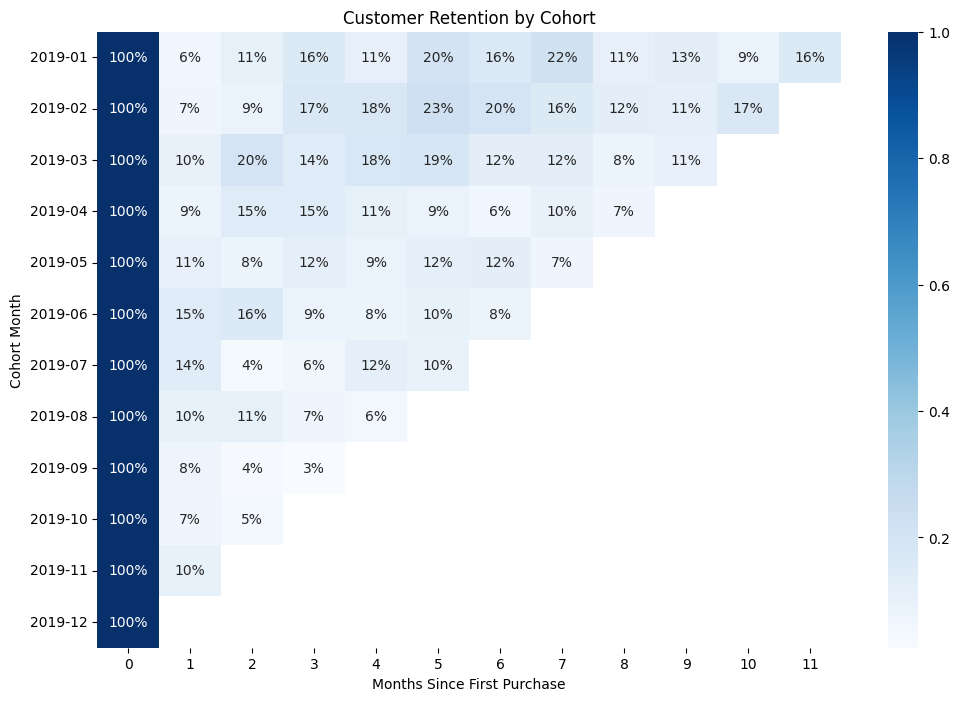

In [98]:
cohort_counts = df.groupby(['cohort_month', 'cohort_index'])['CustomerID'].nunique().reset_index()
cohort_pivot = cohort_counts.pivot(index='cohort_month', columns='cohort_index', values='CustomerID')

# Step 5: Calculate retention rate
cohort_size = cohort_pivot.iloc[:, 0]  # Size of each cohort (column 0 is month 0)
retention_rate = cohort_pivot.divide(cohort_size, axis=0)


max_retention_month = retention_rate.iloc[:, 1:].max(axis=1).idxmax()
max_retention_value = retention_rate.iloc[:, 1:].max(axis=1).max()

print(f"\nThe cohort with the maximum retention is {max_retention_month} with a retention rate of {max_retention_value:.2%} in the following months.")

plt.figure(figsize=(12, 8))
sns.heatmap(retention_rate, annot=True, fmt=".0%", cmap="Blues")
plt.title('Customer Retention by Cohort')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cohort Month')
plt.show()
